In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/alenjose/Desktop/data/cab_trip/train.csv')

In [3]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [5]:
df.describe()[['passenger_count','trip_duration']]

,passenger_count,trip_duration
count,1.458644e+06,1.458644e+06
mean,1.664530e+00,9.594923e+02
std,1.314242e+00,5.237432e+03
min,0.000000e+00,1.000000e+00
25%,1.000000e+00,3.970000e+02
50%,1.000000e+00,6.620000e+02
75%,2.000000e+00,1.075000e+03
max,9.000000e+00,3.526282e+06


# EDA : 

# Q : What is the distribution of trip duration ?

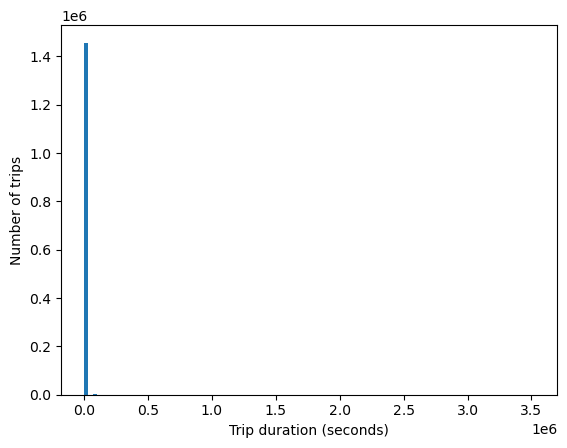

In [6]:
plt.hist(df["trip_duration"], bins=100)
plt.xlabel("Trip duration (seconds)")
plt.ylabel("Number of trips")
plt.show()

## The data was skewed, lets dig into it.

In [7]:
# first lets convert the seconds to minutes.
df['trip_duration'] = df['trip_duration']/60

In [8]:
df[['trip_duration']].describe()

,trip_duration
count,1.458644e+06
mean,1.599154e+01
std,8.729053e+01
min,1.666667e-02
25%,6.616667e+00
50%,1.103333e+01
75%,1.791667e+01
max,5.877137e+04


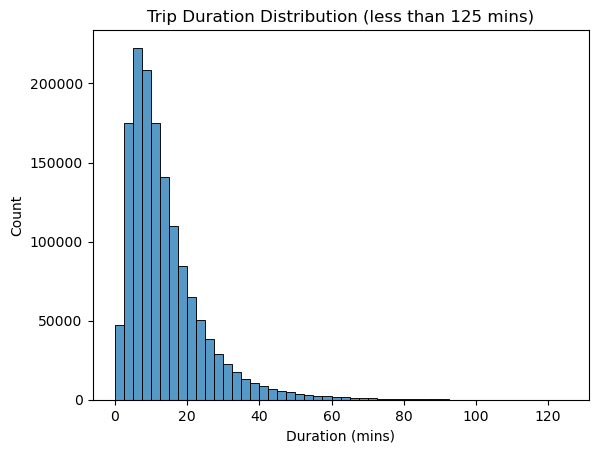

In [9]:
# had to reduce the minutes down to this, as there were a lot of trips 
# with duration less than 60mins
sns.histplot(data=df[df['trip_duration']<125], x='trip_duration', bins=50)

plt.xlabel('Duration (mins)')
plt.title('Trip Duration Distribution (less than 125 mins)')
plt.show()

## A lot of trips were made with durations around 20 mins and it gradually declines as the duration increases. It is tricky to pllot the rest because the points are vastly distributed with a low count and a hist plot wouldnt reveal the trend

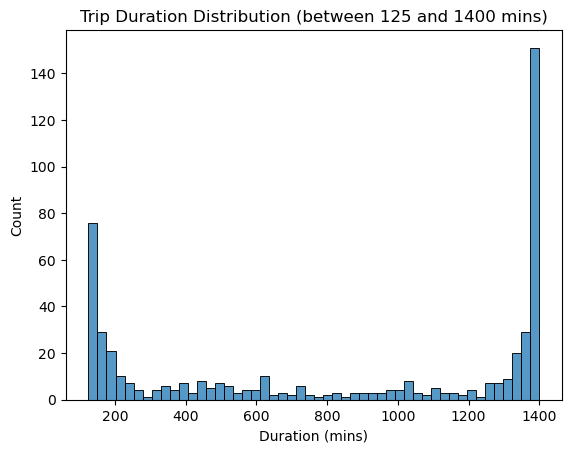

In [10]:
# this shows a sudden spike in the trips with duration around 1400 mins.
sns.histplot(data=(df[(df['trip_duration']>125) & (df['trip_duration']<1400)]),x='trip_duration', bins=50)

plt.xlabel('Duration (mins)')
plt.title('Trip Duration Distribution (between 125 and 1400 mins)')
plt.show()

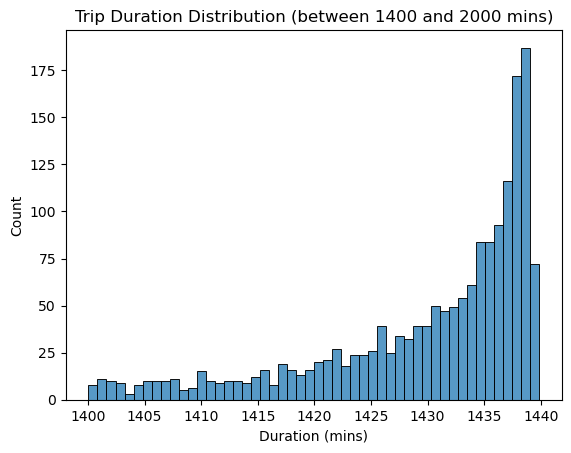

In [11]:
sns.histplot(data=(df[(df['trip_duration']>1400) & (df['trip_duration']<2000)]),x='trip_duration', bins=50)
plt.xlabel('Duration (mins)')
plt.title('Trip Duration Distribution (between 1400 and 2000 mins)')
plt.show()

## The plot above clearly shows the distribution of trips made with durations in the range 1400 to 2000

In [12]:
#  there are only 4 trips with duration greater than 4000mins 
# and they are all of large values.
df[(df['trip_duration']>4000)]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
355003,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.789650,40.643559,-73.956810,40.773087,N,32328.933333
680594,id0369307,1,2016-02-13 22:38:00,2016-03-08 15:57:38,2,-73.921677,40.735252,-73.984749,40.759979,N,34159.633333
924150,id1325766,1,2016-01-05 06:14:15,2016-01-31 01:01:07,1,-73.983788,40.742325,-73.985489,40.727676,N,37126.866667
978383,id0053347,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,N,58771.366667


# Q : How does trip duration vary by pickup/dropoff location, time of day, and day of the week?


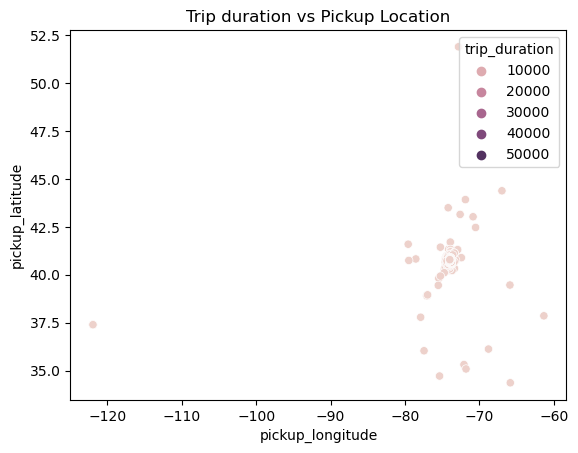

In [13]:
sns.scatterplot( data=df, x='pickup_longitude', y='pickup_latitude', hue='trip_duration')
plt.title('Trip duration vs Pickup Location')
plt.show()

In [14]:
pick_loc = df[['pickup_latitude','pickup_longitude','trip_duration']]

In [15]:
# import folium

In [16]:
# map_new = folium.Map(location = [pick_loc[:30]['pickup_latitude'].mean(),
#                   pick_loc[:30]['pickup_longitude'].mean()],
#                      zoom_start=10)

# list_coor=pick_loc[:30].values.tolist()

# for i in list_coor:
#     map_new.add_child(folium.Marker(location=[i[0],i[1]],
#                         popup=i[2],icon=folium.Icon(color='green')))
    
# map_new

In [17]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [18]:
time_df = df[['pickup_datetime','trip_duration']].copy()

In [19]:
time_df['pickup_hour'] = time_df['pickup_datetime'].apply(lambda x:x.hour)

In [20]:
time_df.head(2)

,pickup_datetime,trip_duration,pickup_hour
0,2016-03-14 17:24:55,7.583333,17
1,2016-06-12 00:43:35,11.050000,0


In [21]:
avg_duration_hourly = time_df.groupby('pickup_hour').mean()

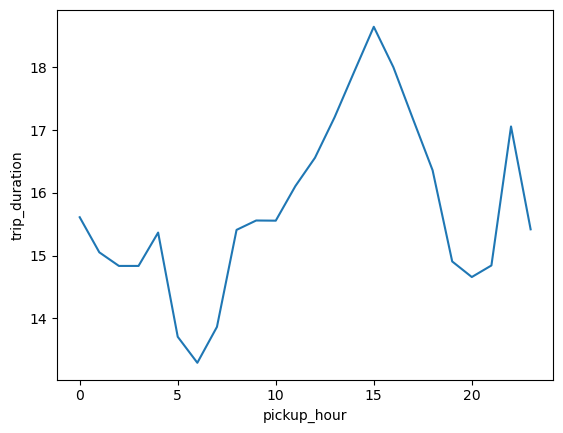

In [22]:
sns.lineplot(x = 'pickup_hour', 
             y = 'trip_duration', 
             data = avg_duration_hourly
            )

plt.show()

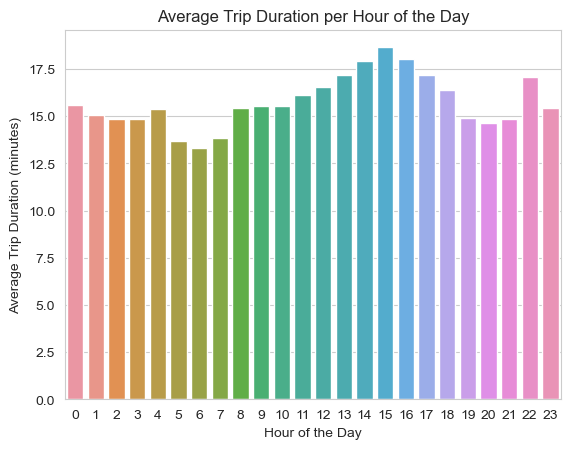

In [23]:
sns.set_style("whitegrid")

sns.barplot(x=avg_duration_hourly.index, 
            y=[i[0] for i in avg_duration_hourly.values])

plt.title('Average Trip Duration per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Trip Duration (minutes)')

plt.show()

In [24]:
time_df['dayOfWeek'] = time_df['pickup_datetime'].apply(lambda x:x.strftime('%A'))

In [25]:
dayOfWeek_df = time_df.groupby('dayOfWeek').mean()[['trip_duration']]
dayOfWeek_df.head(2)

,trip_duration
dayOfWeek,
Friday,16.503737
Monday,14.965797


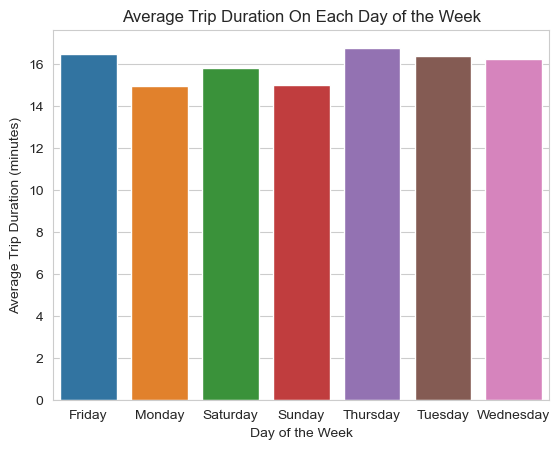

In [26]:
sns.barplot(x=dayOfWeek_df.index, 
            y=[i[0] for i in dayOfWeek_df.values])

plt.title('Average Trip Duration On Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Trip Duration (minutes)')

plt.show()

# Q : What is the average speed of the taxi during the trip?


In [27]:
df['trip_dur_hours'] = df['trip_duration'] / 60

In [28]:
cords = df[['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude']].copy()

In [29]:
from geopy import distance

def find_distance(df):
    cords_zipped = zip(df['pickup_latitude'].astype(float),
                       df['pickup_longitude'].astype(float),
                       df['dropoff_latitude'].astype(float),
                       df['dropoff_longitude'].astype(float))
    n = 0
    df['distance'] = 0
    for lat1, lon1, lat2, lon2 in cords_zipped:
            c1 = (lat1,lon1)
            c2 = (lat2,lon2)
            df.loc[n, 'distance'] = distance.distance(c1,c2).km
            n = n + 1

In [30]:
find_distance(cords)

In [31]:
cords['duration'] = df['trip_dur_hours']
cords = cords[['distance','duration']]
cords['speed'] = cords['distance'] / cords['duration']
cords.head()

,distance,duration,speed
0,1.502172,0.126389,11.885316
1,1.808660,0.184167,9.820778
2,6.379687,0.590000,10.813029
3,1.483632,0.119167,12.450063
4,1.187038,0.120833,9.823760


In [32]:
cords['pickup_dayOfWeek'] = time_df['dayOfWeek']
cords['pickup_hour'] = time_df['pickup_hour']
cords.head(3)

,distance,duration,speed,pickup_dayOfWeek,pickup_hour
0,1.502172,0.126389,11.885316,Monday,17
1,1.808660,0.184167,9.820778,Sunday,0
2,6.379687,0.590000,10.813029,Tuesday,11


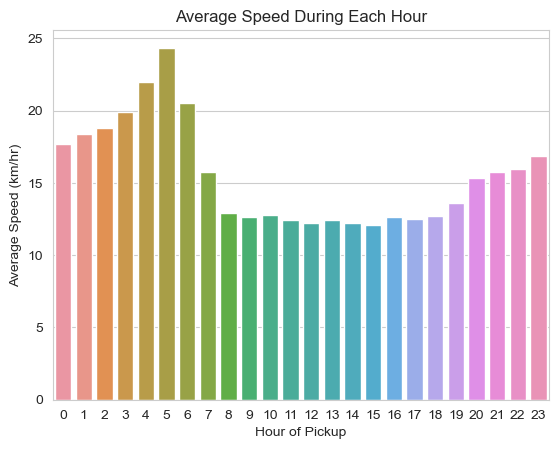

In [33]:
cords_df = cords.groupby('pickup_hour').mean()[['speed']]

sns.barplot(x=cords_df.index, 
            y=[i[0] for i in cords_df.values])

plt.title('Average Speed During Each Hour')
plt.xlabel('Hour of Pickup')
plt.ylabel('Average Speed (km/hr)')

plt.show()

## It is clear that the drivers are able to drive easier after 12am because of dimnishing traffic. Early morning to evenings are quite busy and the average speed is comparatively  lower. 

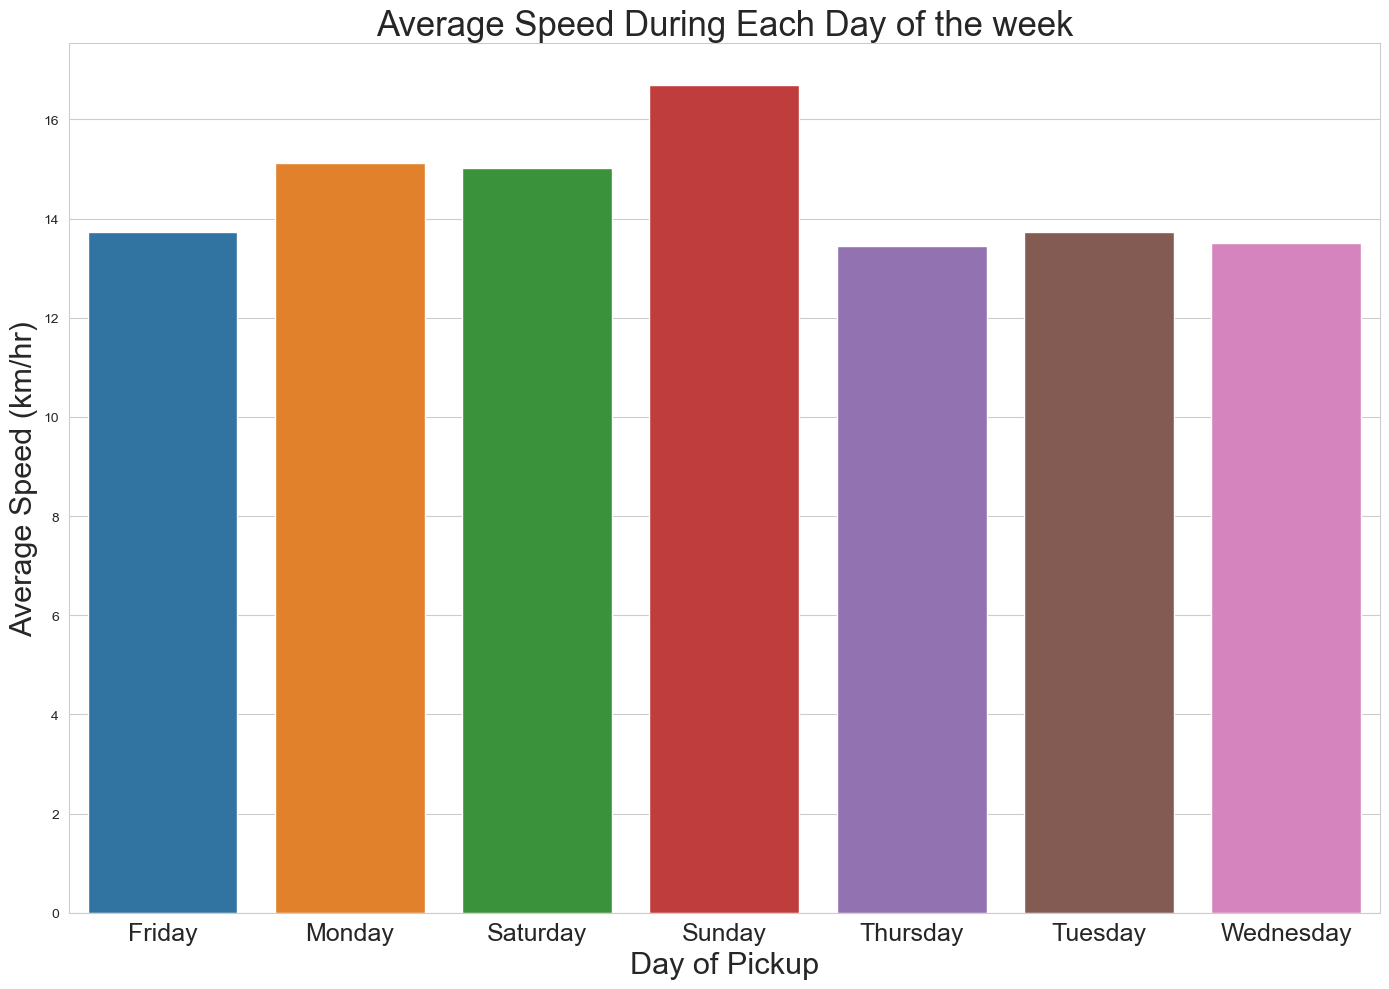

In [34]:
cords_df = cords.groupby('pickup_dayOfWeek').mean()[['speed']]

fig, ax = plt.subplots(figsize=(14, 10))
sns.barplot(x=cords_df.index, 
            y=[i[0] for i in cords_df.values])

ax.set_title('Average Speed During Each Day of the week', fontsize=25)
ax.set_xlabel('Day of Pickup', fontsize=22)
ax.set_ylabel('Average Speed (km/hr)', fontsize=22)

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=18)

plt.tight_layout()

plt.show()

## As expected sundays are calmer with thursday being the busiest. 

# What is the distribution of the number of passengers per trip?

In [35]:
count_df = df.groupby('passenger_count').count()[['id']]

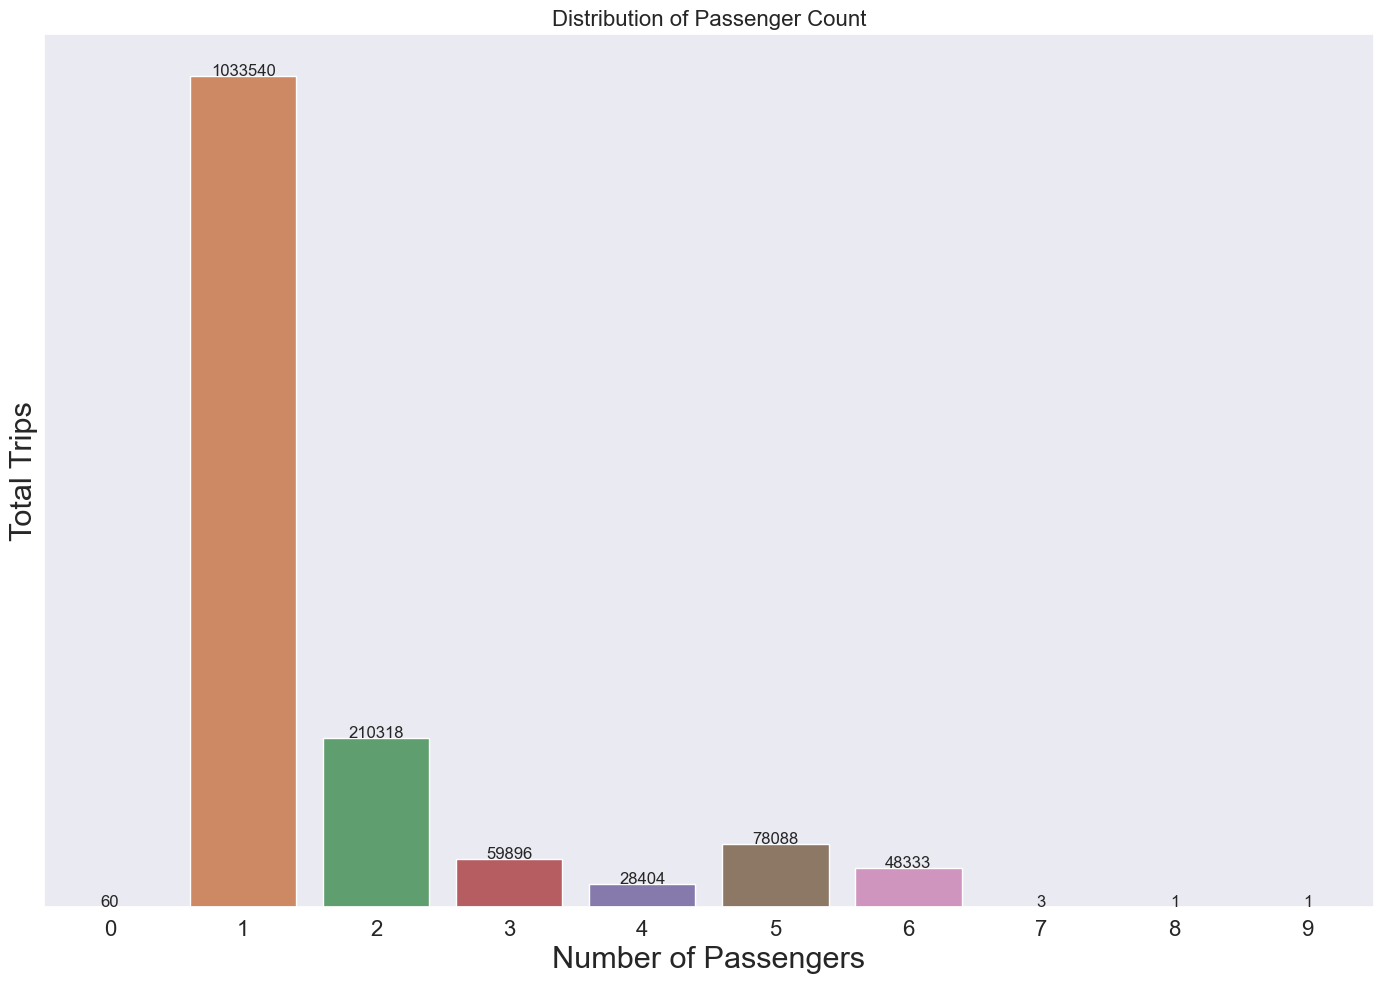

In [36]:
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(14, 10))
sns.barplot(x=count_df.index, y=count_df.values.flatten(), ax=ax)

ax.set_title('Distribution of Passenger Count', fontsize=16)
ax.set_xlabel('Number of Passengers', fontsize=22)
ax.set_ylabel('Total Trips', fontsize=22)

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=16)
ax.set_yticks([])

for i, val in enumerate(count_df.values.flatten()):
    ax.text(i, val+500, f'{val}', ha='center', fontsize=12)

# show the plot
plt.tight_layout()
plt.show()

In [ ]:

# Correlation Analysis: You can analyze the correlation between various columns such as trip duration, distance, and speed to understand how they are related.

# Q : Distribution of Trip Duration

In [42]:
!pip install -U kaleido

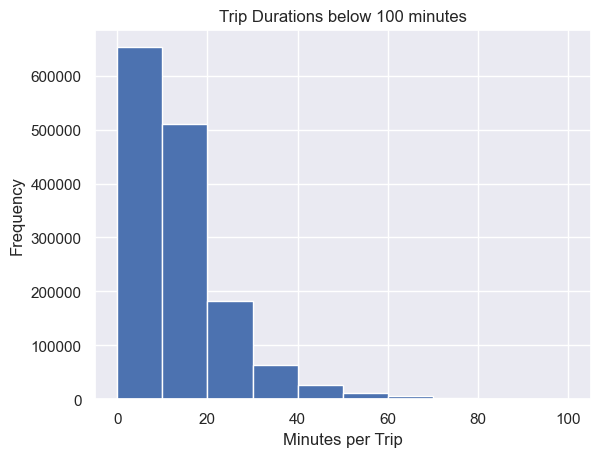

In [54]:
df[df['trip_duration']<100]['trip_duration'].plot(kind='hist')

plt.title('Trip Durations below 100 minutes')
plt.xlabel("Minutes per Trip")
plt.show()

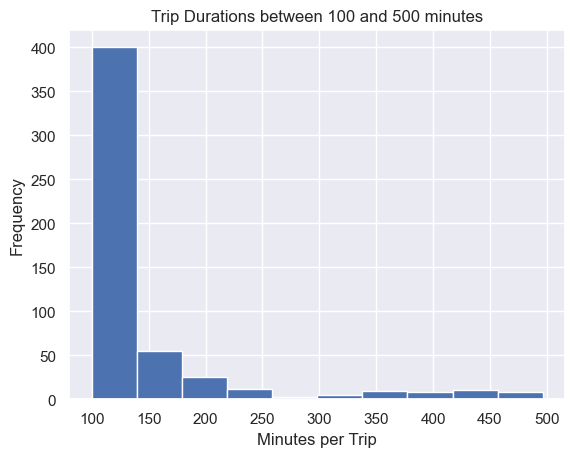

In [44]:
df[(df['trip_duration']>100) & 
   (df['trip_duration']<500)]['trip_duration'].plot(kind='hist')

plt.title('Trip Durations between 100 and 500 minutes')
plt.xlabel("Minutes per Trip")
plt.show()

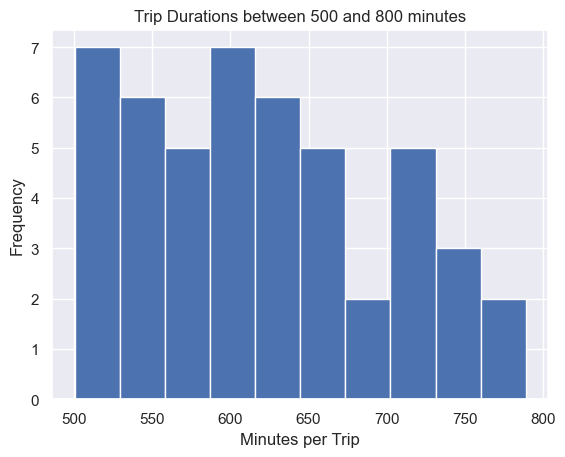

In [45]:
df[(df['trip_duration']>500) 
   & (df['trip_duration']<800)]['trip_duration'].plot(kind='hist')
plt.title('Trip Durations between 500 and 800 minutes')
plt.xlabel("Minutes per Trip")
plt.show()

In [ ]:
# px.set_mapbox_access_token("pk.eyJ1IjoiYWxlbmpvc2UiLCJhIjoiY2twcW00a29mMGt4cjJxczQ1bzJpaDdsOSJ9.Qzu02IEHWN8GDlZaSEPFKA")

# fig = px.scatter_mapbox(data_frame=pick_loc, 
#                         lat="pickup_latitude", 
#                         lon="pickup_longitude", 
#                         size='trip_duration',zoom=15)

# fig.show()

# identify outliers in the dataset.

<AxesSubplot:>

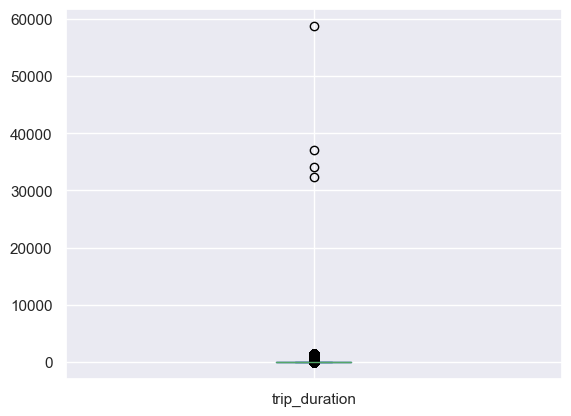

In [46]:
df['trip_duration'].plot(kind='box')

## It is safe to assume there are no trips with minutes greater than 10,000. So we can safely replace these with the mean of the column. 

In [48]:
df.loc[df['trip_duration'] > 10000, 'trip_duration'] = df['trip_duration'].mean()

<AxesSubplot:>

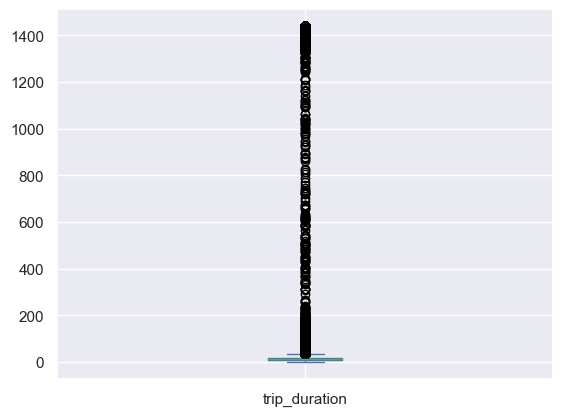

In [49]:
df['trip_duration'].plot(kind='box')

## As there could be trips that can take upto 1400 minutes, we cant remove those records. 

<AxesSubplot:>

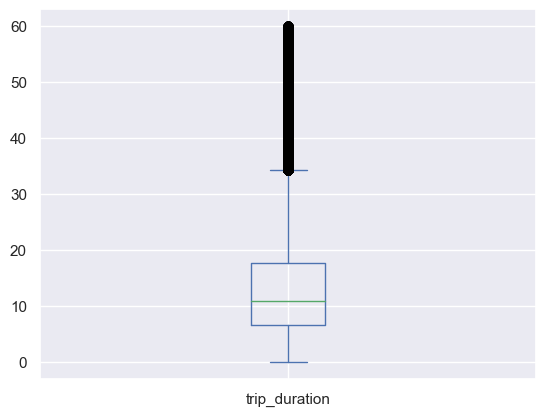

In [50]:
# plot the trips with duration less than 60 to see the data in more detail.
df[df['trip_duration']<60]['trip_duration'].plot(kind='box')

# Lets try to predict the duration of each trip:

## Step 1 : Preprocessing :

In [ ]:
# # picked the needed columns from the main df
# df_main = df[['pickup_datetime','dropoff_datetime',
#               'passenger_count','trip_dur_hours','speed']]

In [ ]:
# joined the necessary column from cords_main to the df above
# df_main = pd.merge(df_main,cords_main[['distance','pickup_dayOfWeek','pickup_hour']],left_index=True,right_index=True)

In [ ]:
# re-ordered columns
# df_main = df_main[['pickup_hour','pickup_dayOfWeek','trip_dur_hours','distance','speed','pickup_datetime','dropoff_datetime','passenger_count']]

In [ ]:
# df_main.info()

In [ ]:
# import requests

# # Set the parameters for the nearby search request
# params = {
#     "location": "40.748817,-73.985428",  # Latitude and longitude of the location
#     "radius": "10000",  # Search radius in meters
#     "type": "tourist_attraction",  # Type of place to search for
#     "key": "f2a13d1003b84e4f8412d79b2c81e625f36d4ef6"  # Your Google Places API key
# }

# # Send a GET request to the nearby search endpoint
# response = requests.get("https://maps.googleapis.com/maps/api/place/nearbysearch/json", params=params)

# # Parse the response and extract the relevant information
# results = response.json()["results"]

# print(response)

In [ ]:
# response.json()